In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16, 'figure.figsize': (40, 8), 'font.family': 'serif', 'text.usetex': True, 'pgf.rcfonts': False})

%load_ext autoreload
%autoreload 2

import jax
jax.config.update('jax_platform_name', 'cpu')
    
from smolyax import indices, nodes
from smolyax.interpolation import SmolyakBarycentricInterpolator

def target_f_1d(x):
    x = np.atleast_1d(x)
    y = np.sin(2 * np.pi * x) * np.cos(4 * np.pi * x)
    return y if x.shape[0] > 1 else y[0]

def show_interpolation(target, node_gen, degree) :
    t = indices.find_approximate_threshold([1], m=degree+1, nested=node_gen.is_nested)
    ip = SmolyakBarycentricInterpolator(node_gen=node_gen, k=[1], t=t, d_out=1, f=target)
    
    xi = node_gen[0](degree)
    if np.min(xi) != np.max(xi) :
        x = np.linspace(np.min(xi), np.max(xi), 200)
    else :
        x = np.linspace(-1, 1, 200)
    y_f = target(x)
    y_ip = ip(x[:, None])
    assert np.isnan(y_f).any() == np.isinf(y_f).any() == False
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))    
    axes[0].plot(x, y_f, lw=2, label=r'target $f(x)$')
    axes[0].plot(x, y_ip, lw=2, label=r'interpolant $I[f](x)$')
    axes[0].scatter(xi, target(xi), color='k')
    axes[1].plot(x, y_f - y_ip[:,0], lw=2, label='error $f(x)-I[f](x)$')
    axes[1].scatter(xi, np.zeros((len(xi),)), color='k')
    for ax in axes : ax.grid(); ax.legend(); ax.set_xlabel('x')

# Smolyak Interpolation - Example in 1D 

Although designed for high dimensions, the Smolyak interpolation operator can nevertheless be applied to 1D problems as well.

This notebook exemplarily applies the Smolyak interpolation operator on a oscillatory 1D test function.

Shown below are results obtained by using both Leja as well as Gauss-Hermite interpolation nodes and varying polynomial degree. As expected, the error decreases as the polynomial degree increases.

### Leja interpolation nodes

In [2]:
node_gen_leja = nodes.Leja(domains=[[-2.,1.]])

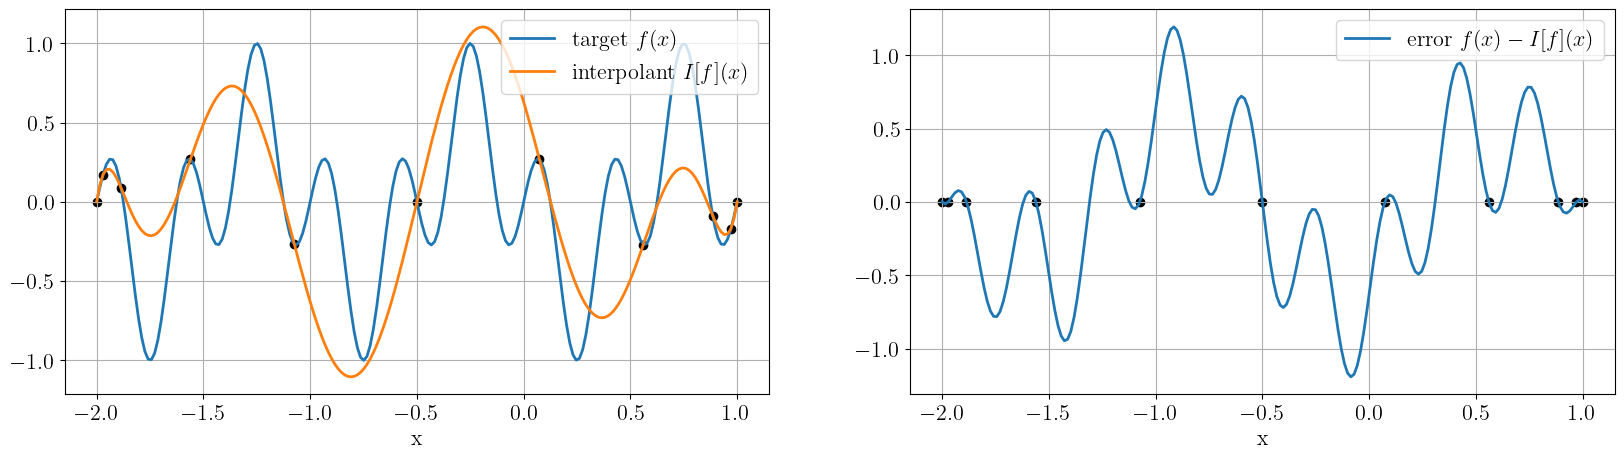

In [3]:
show_interpolation(target_f_1d, node_gen_leja, degree=10)

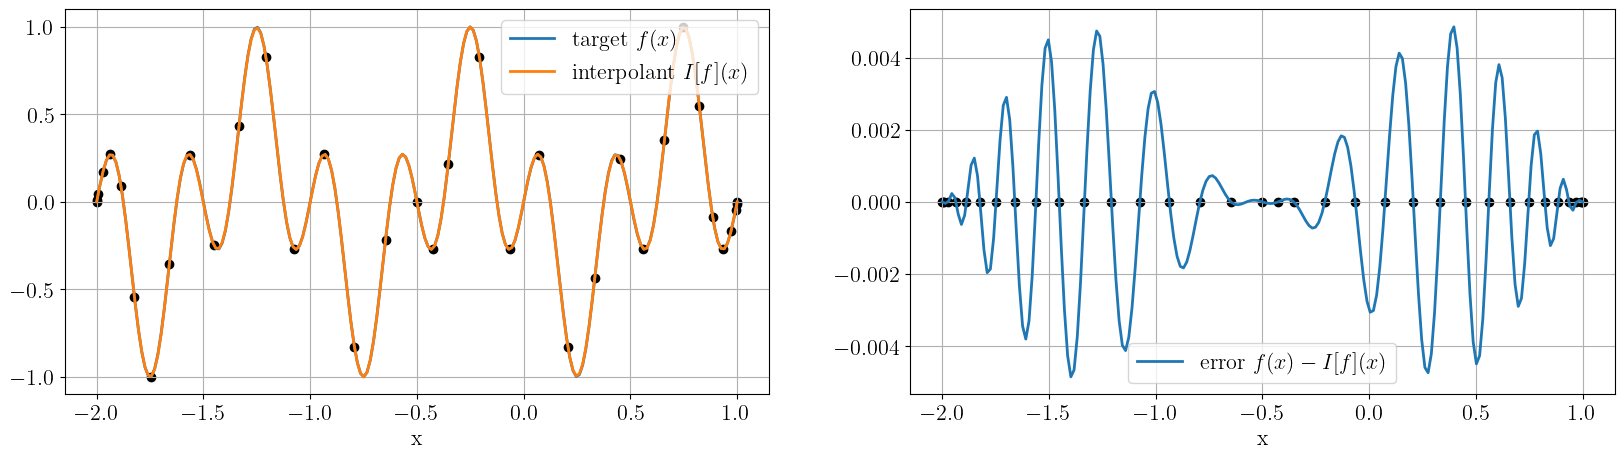

In [4]:
show_interpolation(target_f_1d, node_gen_leja, degree=35)

### Gauß-Hermite interpolation nodes

In [5]:
node_gen_gaussh = nodes.GaussHermite(mean=np.array([0]), scaling=np.array([.12]))

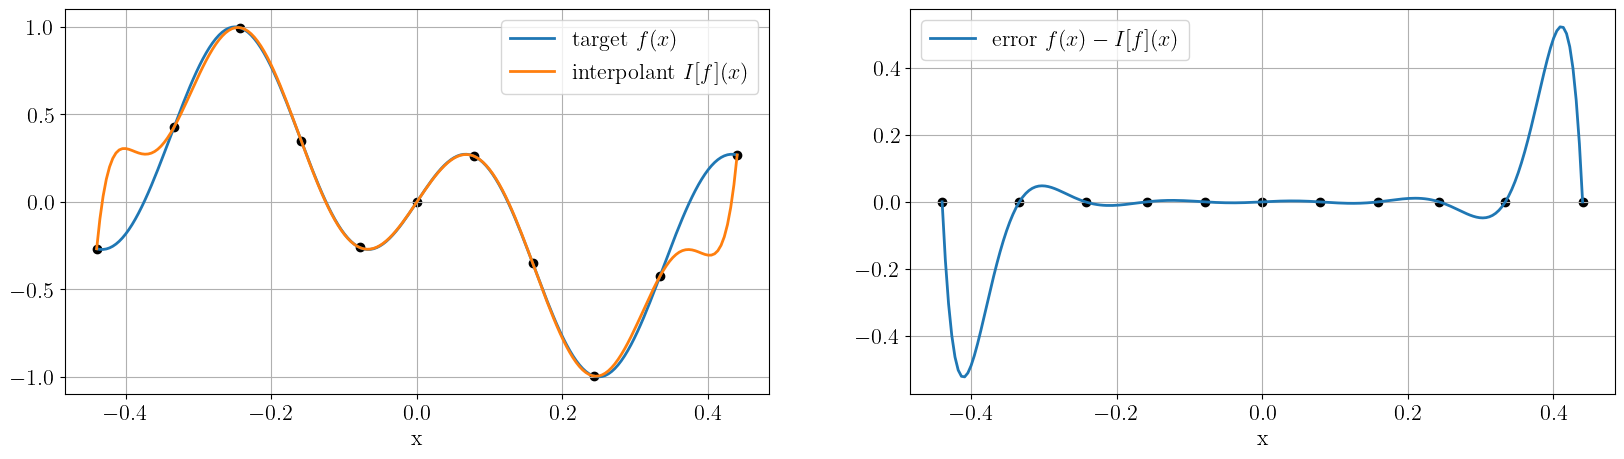

In [6]:
show_interpolation(target_f_1d, node_gen_gaussh, degree=10)

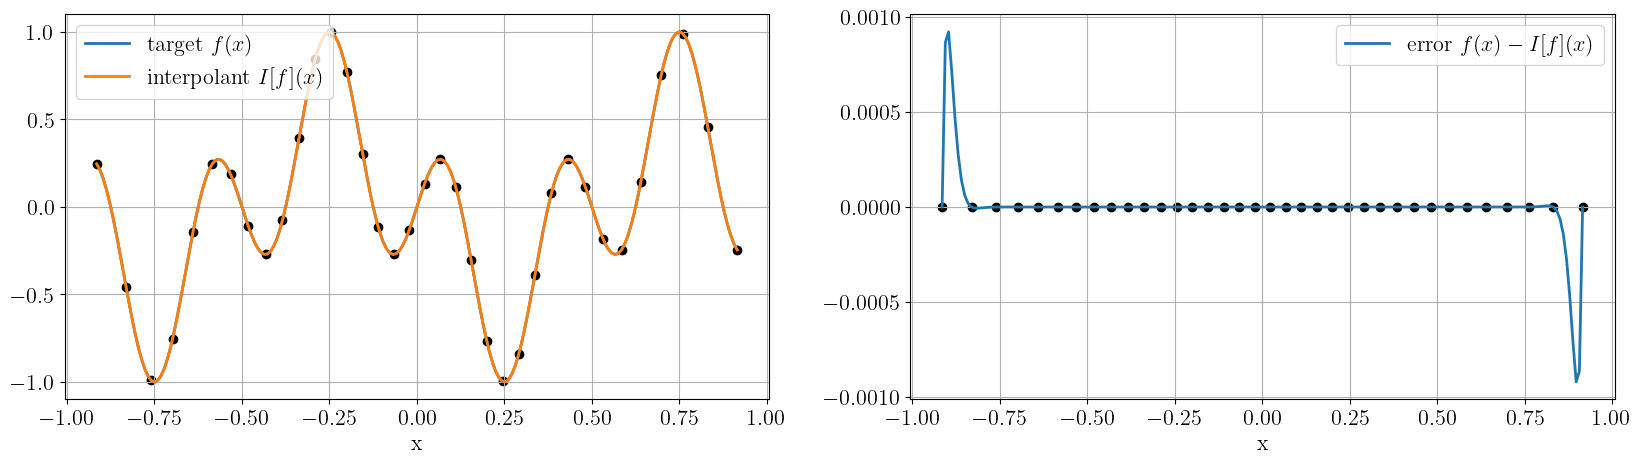

In [7]:
show_interpolation(target_f_1d, node_gen_gaussh, degree=35)